In [1]:
from pyspark.sql import SparkSession
import os

from dotenv import load_dotenv

load_dotenv()

os.environ["PYSPARK_SUBMIT_ARGS"] = "--packages org.apache.hadoop:hadoop-aws:3.3.4,io.delta:delta-spark_2.12:3.3.0,org.apache.spark:spark-sql-kafka-0-10_2.12:3.5.4,org.apache.kafka:kafka-clients:3.9.0,org.apache.spark:spark-avro_2.12:3.5.1 pyspark-shell"

# Initialize Spark session with Delta Lake and MinIO support
spark = (SparkSession.builder \
    .appName("DeltaLakeWithMinIO") \
    ## Delta
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    #Hive Catalog
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog") \
    ## Optimize Delta
    .config("delta.autoOptimize.optimizeWrite", "true") \
    .config("delta.autoOptimize.autoCompact", "true") \
    .config("spark.delta.logStore.class", "org.apache.spark.sql.delta.storage.S3SingleDriverLogStore") \
    ## MinIO
    .config("spark.hadoop.fs.s3a.endpoint", os.getenv("MINIO_ENDPOINT")) \
    .config("spark.hadoop.fs.s3a.access.key", os.getenv("MINIO_ACCESS_KEY")) \
    .config("spark.hadoop.fs.s3a.secret.key", os.getenv("MINIO_SECRET_KEY")) \
    .config('spark.hadoop.fs.s3a.attempts.maximum', "3") \
    .config('spark.hadoop.fs.s3a.connection.timeout', "10000") \
    .config('spark.hadoop.fs.s3a.connection.establish.timeout', "5000") \
    .config("spark.hadoop.fs.s3a.path.style.access", "true") \
    .config("spark.hadoop.fs.s3a.impl", "org.apache.hadoop.fs.s3a.S3AFileSystem") \
    .config("spark.hadoop.fs.s3.impl", "org.apache.hadoop.fs.s3a.S3AFileSystem") \
    .config("spark.hadoop.fs.s3n.impl", "org.apache.hadoop.fs.s3a.S3AFileSystem") \
    .getOrCreate())

your 131072x1 screen size is bogus. expect trouble
25/04/21 19:02:56 WARN Utils: Your hostname, CPC-12806 resolves to a loopback address: 127.0.1.1; using 172.26.242.248 instead (on interface eth0)
25/04/21 19:02:56 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


:: loading settings :: url = jar:file:/home/arthur/streaming-pipeline/src/.venv/lib/python3.13/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/arthur/.ivy2/cache
The jars for the packages stored in: /home/arthur/.ivy2/jars
org.apache.hadoop#hadoop-aws added as a dependency
io.delta#delta-spark_2.12 added as a dependency
org.apache.spark#spark-sql-kafka-0-10_2.12 added as a dependency
org.apache.kafka#kafka-clients added as a dependency
org.apache.spark#spark-avro_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-281b6daf-820a-453d-b3fd-ef6efb9791ba;1.0
	confs: [default]
	found org.apache.hadoop#hadoop-aws;3.3.4 in central
	found com.amazonaws#aws-java-sdk-bundle;1.12.262 in central
	found org.wildfly.openssl#wildfly-openssl;1.0.7.Final in central
	found io.delta#delta-spark_2.12;3.3.0 in central
	found io.delta#delta-storage;3.3.0 in central
	found org.antlr#antlr4-runtime;4.9.3 in central
	found org.apache.spark#spark-sql-kafka-0-10_2.12;3.5.4 in central
	found org.apache.spark#spark-token-provider-kafka-0-10_2.12;3.5.4 in central
	found org.apache.ha

In [2]:
spark.sql("DESCRIBE delta.`s3a://lakehouse/delta/raw_control_power-avro/`").show()

25/04/21 19:03:03 WARN MetricsConfig: Cannot locate configuration: tried hadoop-metrics2-s3a-file-system.properties,hadoop-metrics2.properties
25/04/21 19:03:04 WARN DeltaTableUtils: Access error while exploring path hierarchy for a delta log.original path=s3a://lakehouse/delta/raw_control_power-avro, path with error=s3a://lakehouse/delta.
java.nio.file.AccessDeniedException: s3a://lakehouse/delta/_delta_log: getFileStatus on s3a://lakehouse/delta/_delta_log: com.amazonaws.services.s3.model.AmazonS3Exception: Forbidden (Service: Amazon S3; Status Code: 403; Error Code: 403 Forbidden; Request ID: 183874884C4CB0E7; S3 Extended Request ID: a51c4a764fb286f27b0492d8227ee2bbd3f18b592bcc227ddb984b334e9e8d08; Proxy: null), S3 Extended Request ID: a51c4a764fb286f27b0492d8227ee2bbd3f18b592bcc227ddb984b334e9e8d08:403 Forbidden
	at org.apache.hadoop.fs.s3a.S3AUtils.translateException(S3AUtils.java:255)
	at org.apache.hadoop.fs.s3a.S3AUtils.translateException(S3AUtils.java:175)
	at org.apache.hadoo

Py4JJavaError: An error occurred while calling o57.sql.
: java.nio.file.AccessDeniedException: s3a://lakehouse/delta/raw_control_power-avro/_delta_log: getFileStatus on s3a://lakehouse/delta/raw_control_power-avro/_delta_log: com.amazonaws.services.s3.model.AmazonS3Exception: Forbidden (Service: Amazon S3; Status Code: 403; Error Code: 403 Forbidden; Request ID: 18387488416454D4; S3 Extended Request ID: a51c4a764fb286f27b0492d8227ee2bbd3f18b592bcc227ddb984b334e9e8d08; Proxy: null), S3 Extended Request ID: a51c4a764fb286f27b0492d8227ee2bbd3f18b592bcc227ddb984b334e9e8d08:403 Forbidden
	at org.apache.hadoop.fs.s3a.S3AUtils.translateException(S3AUtils.java:255)
	at org.apache.hadoop.fs.s3a.S3AUtils.translateException(S3AUtils.java:175)
	at org.apache.hadoop.fs.s3a.S3AFileSystem.s3GetFileStatus(S3AFileSystem.java:3796)
	at org.apache.hadoop.fs.s3a.S3AFileSystem.innerGetFileStatus(S3AFileSystem.java:3688)
	at org.apache.hadoop.fs.s3a.S3AFileSystem.lambda$exists$34(S3AFileSystem.java:4703)
	at org.apache.hadoop.fs.statistics.impl.IOStatisticsBinding.lambda$trackDurationOfOperation$5(IOStatisticsBinding.java:499)
	at org.apache.hadoop.fs.statistics.impl.IOStatisticsBinding.trackDuration(IOStatisticsBinding.java:444)
	at org.apache.hadoop.fs.s3a.S3AFileSystem.trackDurationAndSpan(S3AFileSystem.java:2337)
	at org.apache.hadoop.fs.s3a.S3AFileSystem.trackDurationAndSpan(S3AFileSystem.java:2356)
	at org.apache.hadoop.fs.s3a.S3AFileSystem.exists(S3AFileSystem.java:4701)
	at org.apache.spark.sql.delta.DeltaTableUtils$.findDeltaTableRootThrowOnError(DeltaTable.scala:260)
	at org.apache.spark.sql.delta.DeltaTableUtils$.findDeltaTableRoot(DeltaTable.scala:215)
	at org.apache.spark.sql.delta.DeltaTableUtils$.findDeltaTableRoot(DeltaTable.scala:206)
	at org.apache.spark.sql.delta.DeltaTableUtils$.findDeltaTableRoot(DeltaTable.scala:198)
	at org.apache.spark.sql.delta.sources.DeltaDataSource$.parsePathIdentifier(DeltaDataSource.scala:339)
	at org.apache.spark.sql.delta.catalog.DeltaTableV2.x$1$lzycompute(DeltaTableV2.scala:77)
	at org.apache.spark.sql.delta.catalog.DeltaTableV2.x$1(DeltaTableV2.scala:72)
	at org.apache.spark.sql.delta.catalog.DeltaTableV2.timeTravelByPath$lzycompute(DeltaTableV2.scala:72)
	at org.apache.spark.sql.delta.catalog.DeltaTableV2.timeTravelByPath(DeltaTableV2.scala:72)
	at org.apache.spark.sql.delta.catalog.DeltaTableV2.$anonfun$timeTravelSpec$1(DeltaTableV2.scala:129)
	at scala.Option.orElse(Option.scala:447)
	at org.apache.spark.sql.delta.catalog.DeltaTableV2.timeTravelSpec$lzycompute(DeltaTableV2.scala:129)
	at org.apache.spark.sql.delta.catalog.DeltaTableV2.timeTravelSpec(DeltaTableV2.scala:125)
	at org.apache.spark.sql.delta.catalog.DeltaTableV2.$anonfun$initialSnapshot$1(DeltaTableV2.scala:148)
	at org.apache.spark.sql.delta.catalog.DeltaTableV2$.withEnrichedUnsupportedTableException(DeltaTableV2.scala:407)
	at org.apache.spark.sql.delta.catalog.DeltaTableV2.initialSnapshot$lzycompute(DeltaTableV2.scala:165)
	at org.apache.spark.sql.delta.catalog.DeltaTableV2.initialSnapshot(DeltaTableV2.scala:145)
	at org.apache.spark.sql.delta.catalog.DeltaTableV2.$anonfun$tableSchema$2(DeltaTableV2.scala:190)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.delta.catalog.DeltaTableV2.tableSchema$lzycompute(DeltaTableV2.scala:190)
	at org.apache.spark.sql.delta.catalog.DeltaTableV2.tableSchema(DeltaTableV2.scala:188)
	at org.apache.spark.sql.delta.catalog.DeltaTableV2.schema(DeltaTableV2.scala:195)
	at org.apache.spark.sql.connector.catalog.Table.columns(Table.java:65)
	at org.apache.spark.sql.delta.catalog.DeltaTableV2.columns(DeltaTableV2.scala:60)
	at org.apache.spark.sql.catalyst.analysis.ResolvedTable$.create(v2ResolutionPlans.scala:165)
	at org.apache.spark.sql.catalyst.analysis.Analyzer$ResolveRelations$.$anonfun$lookupTableOrView$3(Analyzer.scala:1235)
	at scala.Option.map(Option.scala:230)
	at org.apache.spark.sql.catalyst.analysis.Analyzer$ResolveRelations$.$anonfun$lookupTableOrView$2(Analyzer.scala:1228)
	at scala.Option.orElse(Option.scala:447)
	at org.apache.spark.sql.catalyst.analysis.Analyzer$ResolveRelations$.org$apache$spark$sql$catalyst$analysis$Analyzer$ResolveRelations$$lookupTableOrView(Analyzer.scala:1223)
	at org.apache.spark.sql.catalyst.analysis.Analyzer$ResolveRelations$$anonfun$apply$14.applyOrElse(Analyzer.scala:1182)
	at org.apache.spark.sql.catalyst.analysis.Analyzer$ResolveRelations$$anonfun$apply$14.applyOrElse(Analyzer.scala:1117)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.$anonfun$resolveOperatorsUpWithPruning$3(AnalysisHelper.scala:138)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(origin.scala:76)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.$anonfun$resolveOperatorsUpWithPruning$1(AnalysisHelper.scala:138)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper$.allowInvokingTransformsInAnalyzer(AnalysisHelper.scala:323)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.resolveOperatorsUpWithPruning(AnalysisHelper.scala:134)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.resolveOperatorsUpWithPruning$(AnalysisHelper.scala:130)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.resolveOperatorsUpWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.$anonfun$resolveOperatorsUpWithPruning$2(AnalysisHelper.scala:135)
	at org.apache.spark.sql.catalyst.trees.UnaryLike.mapChildren(TreeNode.scala:1216)
	at org.apache.spark.sql.catalyst.trees.UnaryLike.mapChildren$(TreeNode.scala:1215)
	at org.apache.spark.sql.catalyst.plans.logical.DescribeRelation.mapChildren(v2Commands.scala:634)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.$anonfun$resolveOperatorsUpWithPruning$1(AnalysisHelper.scala:135)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper$.allowInvokingTransformsInAnalyzer(AnalysisHelper.scala:323)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.resolveOperatorsUpWithPruning(AnalysisHelper.scala:134)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.resolveOperatorsUpWithPruning$(AnalysisHelper.scala:130)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.resolveOperatorsUpWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.analysis.Analyzer$ResolveRelations$.apply(Analyzer.scala:1117)
	at org.apache.spark.sql.catalyst.analysis.Analyzer$ResolveRelations$.apply(Analyzer.scala:1076)
	at org.apache.spark.sql.catalyst.rules.RuleExecutor.$anonfun$execute$2(RuleExecutor.scala:222)
	at scala.collection.LinearSeqOptimized.foldLeft(LinearSeqOptimized.scala:126)
	at scala.collection.LinearSeqOptimized.foldLeft$(LinearSeqOptimized.scala:122)
	at scala.collection.immutable.List.foldLeft(List.scala:91)
	at org.apache.spark.sql.catalyst.rules.RuleExecutor.$anonfun$execute$1(RuleExecutor.scala:219)
	at org.apache.spark.sql.catalyst.rules.RuleExecutor.$anonfun$execute$1$adapted(RuleExecutor.scala:211)
	at scala.collection.immutable.List.foreach(List.scala:431)
	at org.apache.spark.sql.catalyst.rules.RuleExecutor.execute(RuleExecutor.scala:211)
	at org.apache.spark.sql.catalyst.analysis.Analyzer.org$apache$spark$sql$catalyst$analysis$Analyzer$$executeSameContext(Analyzer.scala:240)
	at org.apache.spark.sql.catalyst.analysis.Analyzer.$anonfun$execute$1(Analyzer.scala:236)
	at org.apache.spark.sql.catalyst.analysis.AnalysisContext$.withNewAnalysisContext(Analyzer.scala:187)
	at org.apache.spark.sql.catalyst.analysis.Analyzer.execute(Analyzer.scala:236)
	at org.apache.spark.sql.catalyst.analysis.Analyzer.execute(Analyzer.scala:202)
	at org.apache.spark.sql.catalyst.rules.RuleExecutor.$anonfun$executeAndTrack$1(RuleExecutor.scala:182)
	at org.apache.spark.sql.catalyst.QueryPlanningTracker$.withTracker(QueryPlanningTracker.scala:89)
	at org.apache.spark.sql.catalyst.rules.RuleExecutor.executeAndTrack(RuleExecutor.scala:182)
	at org.apache.spark.sql.catalyst.analysis.Analyzer.$anonfun$executeAndCheck$1(Analyzer.scala:223)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper$.markInAnalyzer(AnalysisHelper.scala:330)
	at org.apache.spark.sql.catalyst.analysis.Analyzer.executeAndCheck(Analyzer.scala:222)
	at org.apache.spark.sql.execution.QueryExecution.$anonfun$analyzed$1(QueryExecution.scala:77)
	at org.apache.spark.sql.catalyst.QueryPlanningTracker.measurePhase(QueryPlanningTracker.scala:138)
	at org.apache.spark.sql.execution.QueryExecution.$anonfun$executePhase$2(QueryExecution.scala:219)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.execution.QueryExecution.$anonfun$executePhase$1(QueryExecution.scala:219)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.QueryExecution.executePhase(QueryExecution.scala:218)
	at org.apache.spark.sql.execution.QueryExecution.analyzed$lzycompute(QueryExecution.scala:77)
	at org.apache.spark.sql.execution.QueryExecution.analyzed(QueryExecution.scala:74)
	at org.apache.spark.sql.execution.QueryExecution.assertAnalyzed(QueryExecution.scala:66)
	at org.apache.spark.sql.Dataset$.$anonfun$ofRows$2(Dataset.scala:99)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.Dataset$.ofRows(Dataset.scala:97)
	at org.apache.spark.sql.SparkSession.$anonfun$sql$1(SparkSession.scala:638)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.SparkSession.sql(SparkSession.scala:629)
	at org.apache.spark.sql.SparkSession.sql(SparkSession.scala:659)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: com.amazonaws.services.s3.model.AmazonS3Exception: Forbidden (Service: Amazon S3; Status Code: 403; Error Code: 403 Forbidden; Request ID: 18387488416454D4; S3 Extended Request ID: a51c4a764fb286f27b0492d8227ee2bbd3f18b592bcc227ddb984b334e9e8d08; Proxy: null), S3 Extended Request ID: a51c4a764fb286f27b0492d8227ee2bbd3f18b592bcc227ddb984b334e9e8d08
	at com.amazonaws.http.AmazonHttpClient$RequestExecutor.handleErrorResponse(AmazonHttpClient.java:1879)
	at com.amazonaws.http.AmazonHttpClient$RequestExecutor.handleServiceErrorResponse(AmazonHttpClient.java:1418)
	at com.amazonaws.http.AmazonHttpClient$RequestExecutor.executeOneRequest(AmazonHttpClient.java:1387)
	at com.amazonaws.http.AmazonHttpClient$RequestExecutor.executeHelper(AmazonHttpClient.java:1157)
	at com.amazonaws.http.AmazonHttpClient$RequestExecutor.doExecute(AmazonHttpClient.java:814)
	at com.amazonaws.http.AmazonHttpClient$RequestExecutor.executeWithTimer(AmazonHttpClient.java:781)
	at com.amazonaws.http.AmazonHttpClient$RequestExecutor.execute(AmazonHttpClient.java:755)
	at com.amazonaws.http.AmazonHttpClient$RequestExecutor.access$500(AmazonHttpClient.java:715)
	at com.amazonaws.http.AmazonHttpClient$RequestExecutionBuilderImpl.execute(AmazonHttpClient.java:697)
	at com.amazonaws.http.AmazonHttpClient.execute(AmazonHttpClient.java:561)
	at com.amazonaws.http.AmazonHttpClient.execute(AmazonHttpClient.java:541)
	at com.amazonaws.services.s3.AmazonS3Client.invoke(AmazonS3Client.java:5456)
	at com.amazonaws.services.s3.AmazonS3Client.invoke(AmazonS3Client.java:5403)
	at com.amazonaws.services.s3.AmazonS3Client.getObjectMetadata(AmazonS3Client.java:1372)
	at org.apache.hadoop.fs.s3a.S3AFileSystem.lambda$getObjectMetadata$10(S3AFileSystem.java:2545)
	at org.apache.hadoop.fs.s3a.Invoker.retryUntranslated(Invoker.java:414)
	at org.apache.hadoop.fs.s3a.Invoker.retryUntranslated(Invoker.java:377)
	at org.apache.hadoop.fs.s3a.S3AFileSystem.getObjectMetadata(S3AFileSystem.java:2533)
	at org.apache.hadoop.fs.s3a.S3AFileSystem.getObjectMetadata(S3AFileSystem.java:2513)
	at org.apache.hadoop.fs.s3a.S3AFileSystem.s3GetFileStatus(S3AFileSystem.java:3776)
	... 105 more


In [ ]:
spark.sql("SELECT timestamp, landing_timestamp, parsed_value.* FROM delta.`s3a://lakehouse/delta/raw_control_power-avro`;").show(5)

25/04/21 18:53:15 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------------------+--------------------+---------------+--------------+--------+---------+-----------+---------+------------+--------------+---------+--------------------+
|           timestamp|   landing_timestamp|robot_action_id|apparent_power| current|frequency|phase_angle|    power|power_factor|reactive_power|  voltage|    source_timestamp|
+--------------------+--------------------+---------------+--------------+--------+---------+-----------+---------+------------+--------------+---------+--------------------+
|2025-04-21 17:32:...|2025-04-21 17:32:...|           20.0|     200.72693|0.969811|49.951218|  331.67798| 176.7024|    0.880312|     -95.21506|227.54025|2025-04-21T20:32:...|
|2025-04-21 17:32:...|2025-04-21 17:32:...|           20.0|     215.05139|1.058344|     50.0|  333.78897|192.94153|    0.897188|     -94.96846| 227.3567|2025-04-21T20:32:...|
|2025-04-21 17:32:...|2025-04-21 17:32:...|           20.0|      202.9893|1.201428|     50.0|  328.55045|173.17442|    0.8531

In [ ]:
df_datalake = spark.sql("SELECT timestamp, landing_timestamp, parsed_value.* FROM delta.`s3a://lakehouse/delta/raw_control_power-avro`;").toPandas()

In [ ]:
import pandas as pd

df_datalake["source_timestamp"] = pd.to_datetime(df_datalake["source_timestamp"]).dt.tz_convert("America/Sao_Paulo")
df_datalake["landing_timestamp"] = pd.to_datetime(df_datalake["landing_timestamp"]).dt.tz_localize("UTC").dt.tz_convert("America/Sao_Paulo")
df_datalake["timestamp"] = pd.to_datetime(df_datalake["timestamp"]).dt.tz_localize("UTC").dt.tz_convert("America/Sao_Paulo")

df_datalake["source_kafka_latency"] = (df_datalake["timestamp"] - df_datalake["source_timestamp"]).dt.total_seconds()
df_datalake["source_kafka_latency"].describe()

count    47280.000000
mean    -10799.971555
std          0.409601
min     -10799.988001
25%     -10799.983151
50%     -10799.974873
75%     -10799.967126
max     -10713.275463
Name: source_kafka_latency, dtype: float64

In [ ]:
df_datalake["kafka_landing_latency"] = (df_datalake["landing_timestamp"] - df_datalake["timestamp"]).dt.total_seconds()
df_datalake["kafka_landing_latency"].describe()

count    4.728000e+04
mean     7.707892e+05
std      4.897172e+05
min      4.000000e-03
25%      5.849844e+05
50%      1.212400e+06
75%      1.213996e+06
max      1.215558e+06
Name: kafka_landing_latency, dtype: float64

In [ ]:
from datetime import datetime

file_name = datetime.now().strftime("%Y-%m-%d-%H_%M_%S") + "-avro.parquet"

print(file_name)

df_datalake.to_parquet(file_name, index=False)

2025-04-21-19_00_31-avro.parquet


In [ ]:
df_plot = df_datalake

In [ ]:
df_plot = df_plot.sort_values("source_timestamp")

23 ms of latency between PC and server at the moment of testing

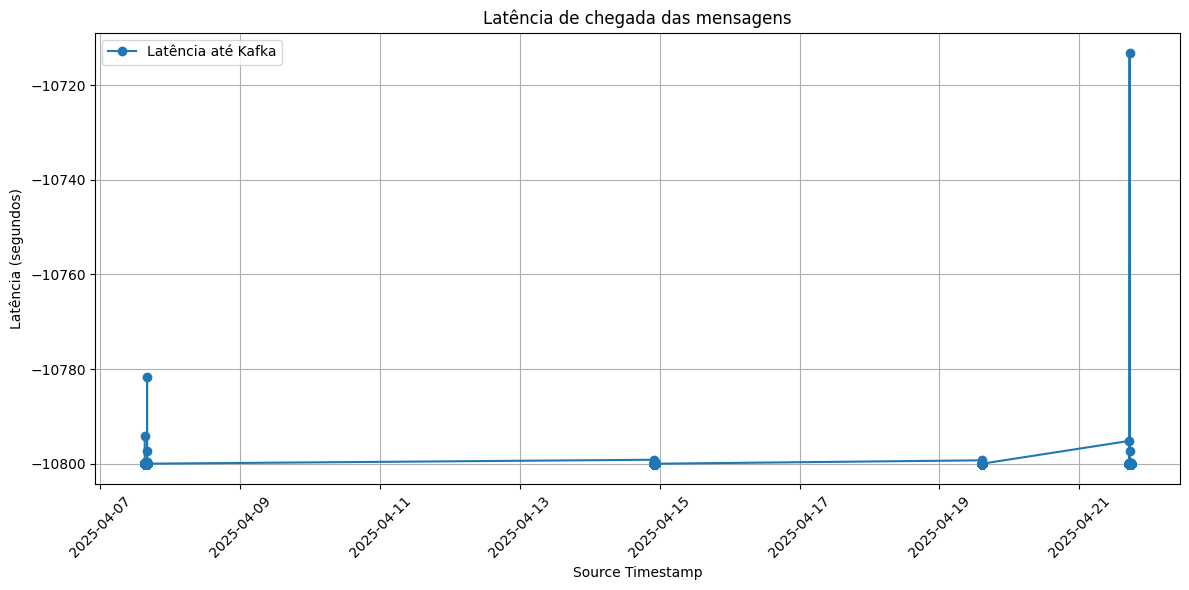

In [ ]:
import matplotlib.pyplot as plt

# Plotar
plt.figure(figsize=(12, 6))
plt.plot(df_plot['source_timestamp'], df_plot['source_kafka_latency'], label='Latência até Kafka', marker='o')
plt.xlabel('Source Timestamp')
plt.ylabel('Latência (segundos)')
plt.title('Latência de chegada das mensagens')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Local MinIO used

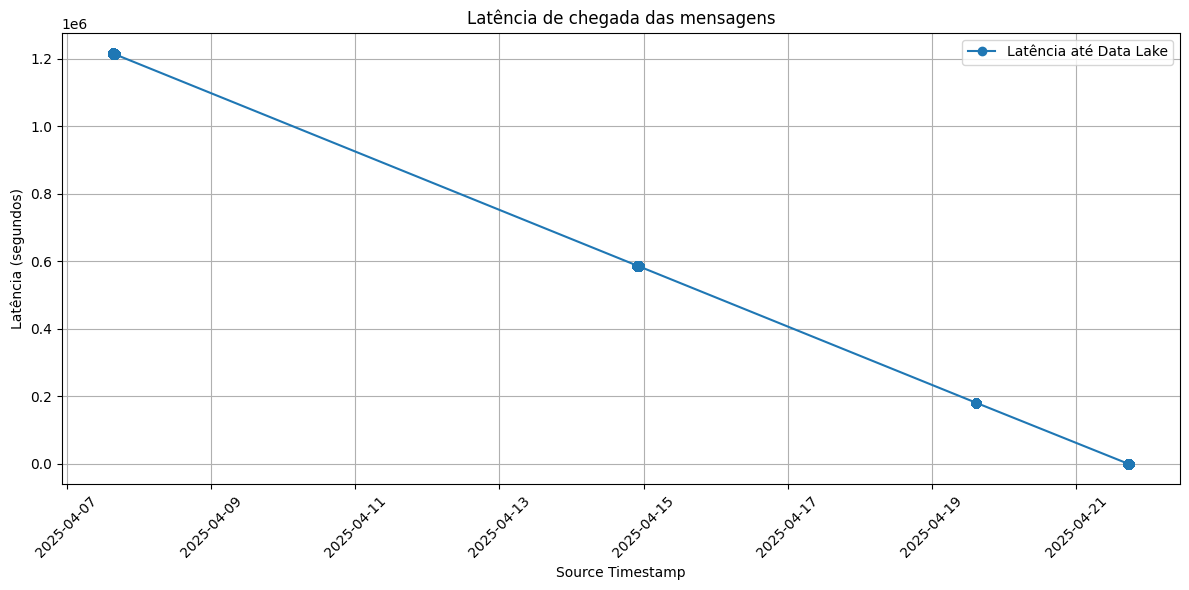

In [ ]:
import matplotlib.pyplot as plt

# Plotar
plt.figure(figsize=(12, 6))
plt.plot(df_plot['source_timestamp'], df_plot['kafka_landing_latency'], label='Latência até Data Lake', marker='o')
plt.xlabel('Source Timestamp')
plt.ylabel('Latência (segundos)')
plt.title('Latência de chegada das mensagens')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()